# IBM HR Analytics Employee Attrition & Performance

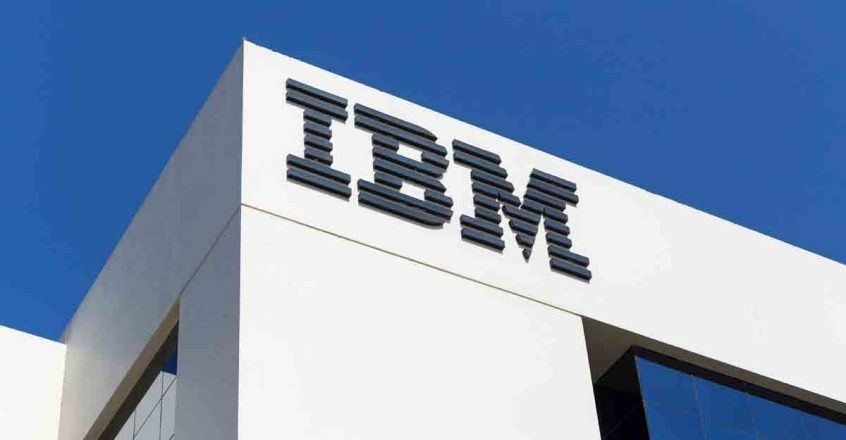

### **Business Problem**

IBM company wants to know why employees are leaving the company

# **Objective**

The company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data Set
df = pd.read_csv('C:\\Users\\pc\\Desktop\\Data Science\\MachineLearning\\Project\\Employee Attrition\\Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Checking Rows and columns
df.shape

(1470, 35)

In [4]:
#Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Checking Null Values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**No Missing Values**

In [6]:
# To set the output column on front

front=df['Attrition']
df.drop(labels=['Attrition'],axis=1,inplace=True)
df.insert(0,'Attrition',front)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Drop Some Features**

In [7]:
df.drop(labels=['EmployeeCount','EmployeeNumber','StockOptionLevel','StandardHours','Over18'],axis=1,inplace=True)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [8]:
# Ecoding Label Column using List comprehension

Attrition={'Yes':1,'No':0}
df.Attrition=[Attrition[item] for item in df.Attrition]

In [9]:
#Get categorical values of column 

df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [10]:
# Employees in the database have several roles on-file

df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

**Encoding Catagorical Features**

In [11]:
df.Gender.replace(['Male','Female'],[1,0],inplace=True)
df.OverTime.replace(['Yes','No'],[1,0],inplace=True)
Field={'Life Sciences':2,'Medical':1,'Other':0,'Marketing':3,'Technical Degree':4,'Human Resources':5}
df.EducationField=[Field[item] for item in df.EducationField]

Encoding catagorical columns like Gender, Overtime, & EducationalField

**Gender**

Male = 1, Female = 0

**Overtime**

Yes = 1, No = 0

**EducationField**

Other:0

Medical:1

Life Sciences:2

Marketing:3

Technical Degree:4

Human Resources:5

# **Exploring the Data**

**Summarizing based on Attrition**

In [12]:
df1=df.groupby('Attrition')
df1.mean()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,1.871046,2.771290,0.593674,65.952149,2.770479,2.145985,...,15.231144,3.153285,2.733982,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.147679,2.464135,0.632911,65.573840,2.518987,1.637131,...,15.097046,3.156118,2.599156,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


The first thing to do is to see what is the attrition rate.

In [13]:
Attrition_Rate=df.Attrition.value_counts()
print(Attrition_Rate)

0    1233
1     237
Name: Attrition, dtype: int64


Text(0.5, 1.0, 'Attrition in %')

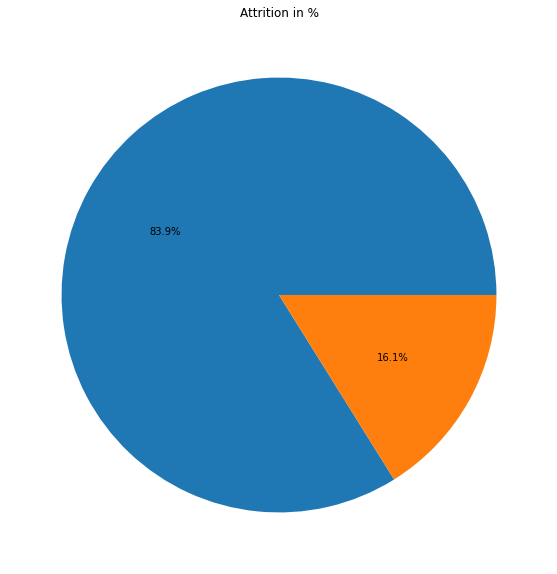

In [14]:
Attrition_Rate=df.Attrition.value_counts()/len(df)
Attrition_Rate
plt.figure(figsize=(10,10))
c=round((Attrition_Rate*100), 2)
plt.pie(Attrition_Rate, autopct='%1.1f%%' )
plt.title("Attrition in %")

Looks like about 84% of employees stayed and 16% of employees left

That is 237 out of 1470 employees churned

**Correlation between parameters**

,Attrition,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,-0.056652,0.077924,-0.031373,0.094277,-0.103369,0.029453,-0.006846,-0.130016,...,-0.013478,0.002889,-0.045872,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.010661,-0.001686,0.208034,0.017366,0.010146,-0.036311,0.024287,0.029820,...,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.056652,0.010661,1.000000,-0.004985,-0.016806,-0.031376,0.018355,-0.011716,0.023381,0.046135,...,0.022704,0.000473,0.007846,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.077924,-0.001686,-0.004985,1.000000,0.021042,0.000068,-0.016075,-0.001851,0.031131,0.008783,...,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.016806,0.021042,1.000000,0.031530,-0.027128,-0.016547,0.016775,0.042438,...,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.094277,0.017366,-0.031376,0.000068,0.031530,1.000000,-0.006058,0.001802,0.021421,-0.009296,...,-0.057384,-0.034845,0.003102,-0.010969,-0.044946,0.001242,0.004016,0.021484,0.002208,0.008355
EnvironmentSatisfaction,-0.103369,0.010146,0.018355,-0.016075,-0.027128,-0.006058,1.000000,0.000508,-0.049857,-0.008278,...,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.029453,-0.036311,-0.011716,-0.001851,-0.016547,0.001802,0.000508,1.000000,-0.000478,0.017960,...,0.002733,-0.013859,0.022868,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
HourlyRate,-0.006846,0.024287,0.023381,0.031131,0.016775,0.021421,-0.049857,-0.000478,1.000000,0.042861,...,-0.009062,-0.002172,0.001330,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.130016,0.029820,0.046135,0.008783,0.042438,-0.009296,-0.008278,0.017960,0.042861,1.000000,...,-0.017205,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


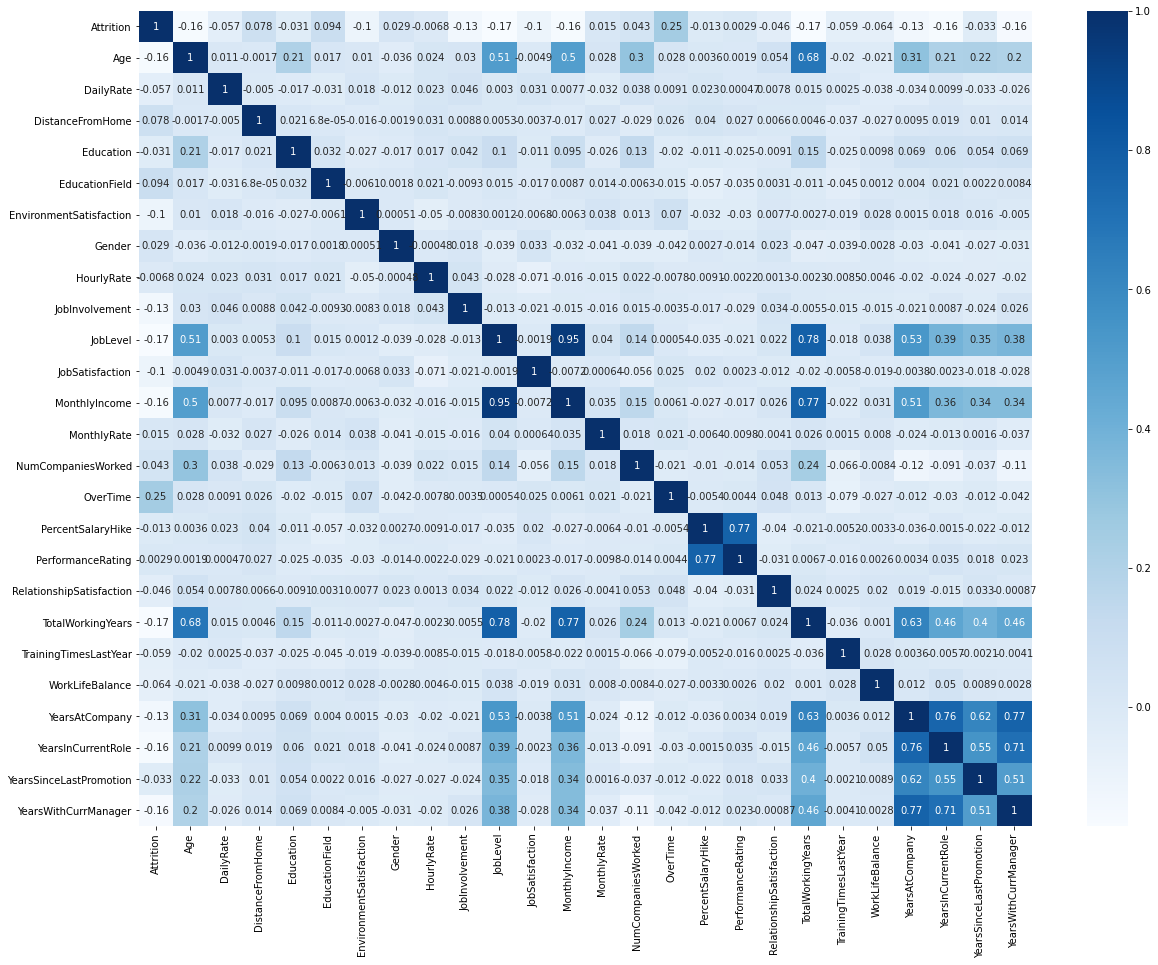

In [15]:
# Check correlation Between features

corr=df.corr()
corr=(corr)
plt.figure(figsize=(20,15))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,cmap='Blues',annot=True)
corr

>  **Exploring Catagorical Features**

Index(['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus'], dtype='object')


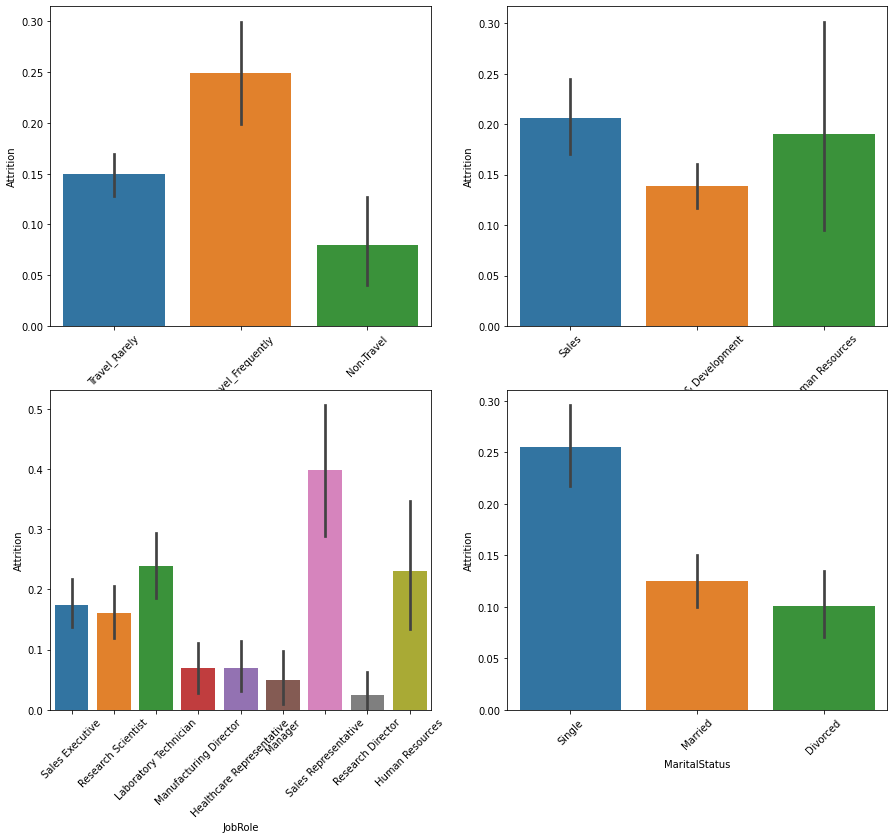

In [16]:
# Relation of target variable with Categorical features
# Object datatypes
obj_fea = df.select_dtypes(include=['object'])
print(obj_fea.columns)
plt.figure(figsize=(15,20))
for i,feat in enumerate(obj_fea.columns):
    plt.subplot(3,2,i+1)
    sns.barplot(x=df[feat],y=df['Attrition'])
    plt.xticks(rotation=45)
plt.show()

**Exploring numerical features**



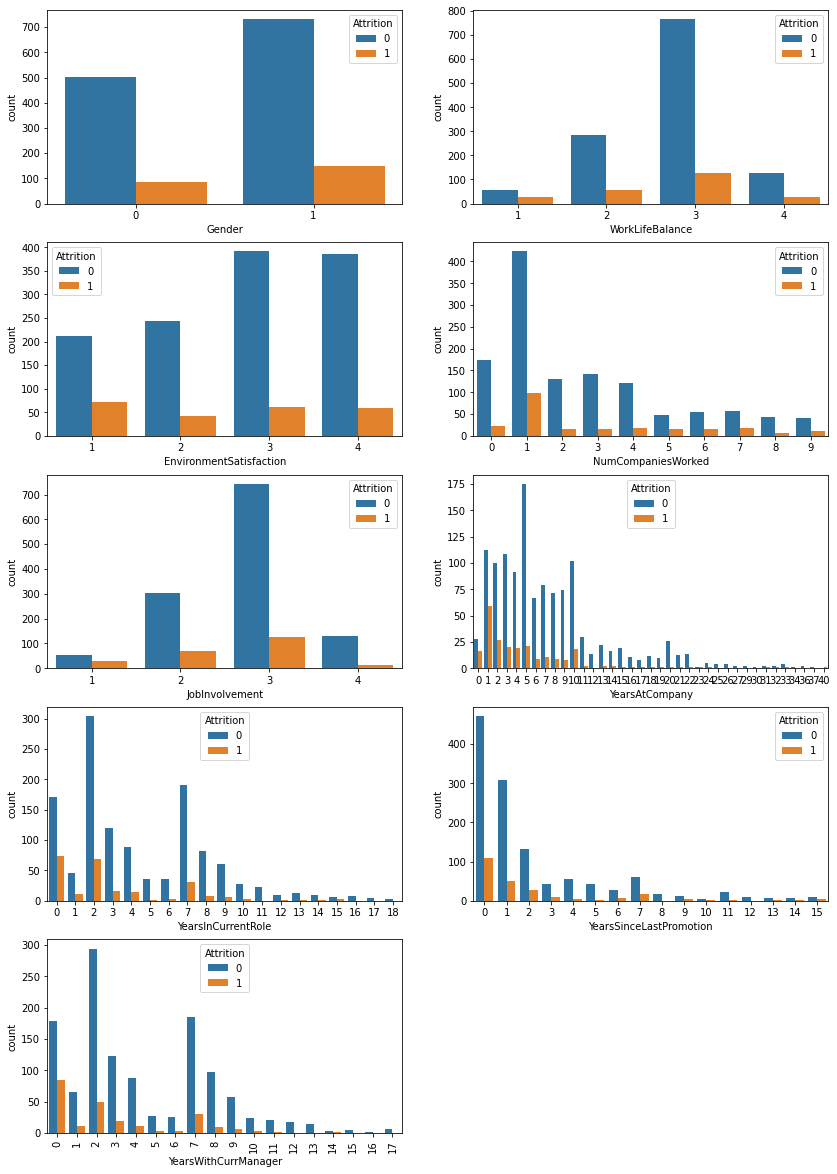

In [17]:
total_records= len(df)
columns = ['Gender','WorkLifeBalance','EnvironmentSatisfaction','NumCompaniesWorked',
           'JobInvolvement','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
plt.figure(figsize=(14,4))
j=0
for i in columns:
    j +=1
    plt.subplot(5,2,j)
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==9 or j== 10):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
# Custom the subplot layout
plt.subplots_adjust(bottom=0.1, top=4)
plt.show()

**Observations:-**

1  Men tends to leave company sooner than women

2  Who have least worklife balance tends to resign faster than other

3  Who leastly likes the environment in company tends to leave company sooner than others

4  Who worked for more number of compannies tends to switch again!

5  Who leastly involves in Job in company tends to leave company sooner than others

6  Seniors in company tends to leave sooner than others, Employee leaving the company at initial stage

7  Who stays in current role for longer time and who just got new role tends to leave company sooner than others

8  Who don't get promotion for long time tends to leave comapany

9  Who stays with Manager for longer time and shorter time tends to leave company than others  

**Age Vs Attrition**

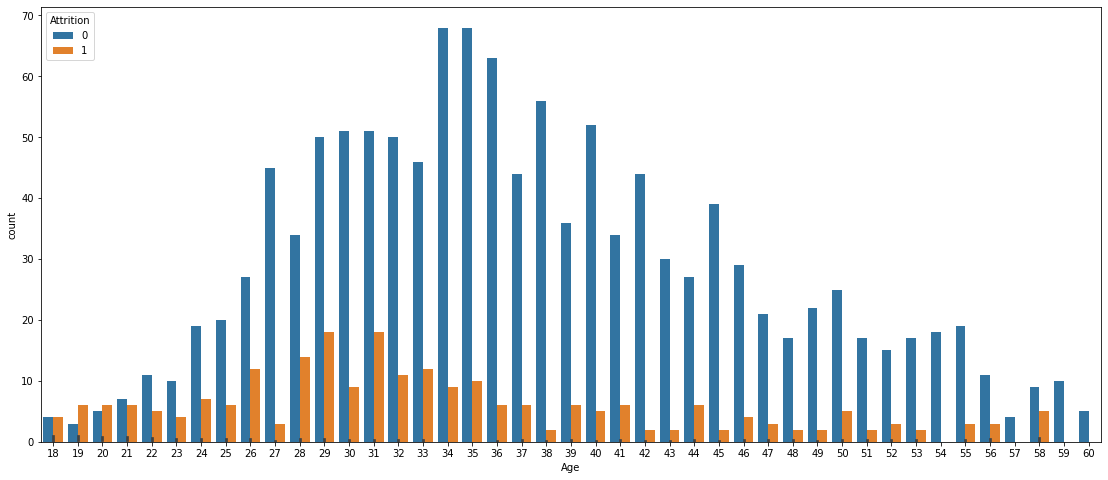

In [18]:
plt.figure(figsize=(19,8))
sns.barplot(x=df['Age'],y=df['Attrition'])
sns.countplot(x='Age',hue='Attrition',data=df)
plt.show()

**Observations:-**

Age is distributed quite normally and Employee who churn are younger.

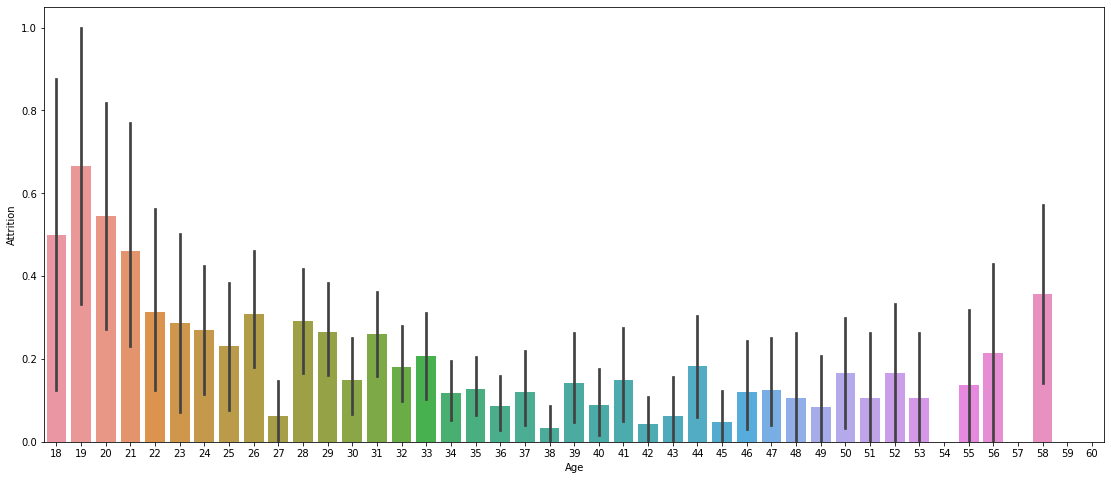

In [19]:
plt.figure(figsize=(19,8))
sns.barplot(x=df['Age'],y=df['Attrition'])

plt.show()

**Observations:-**

*  Teenagers highly tends to leave company than Mid aged

*  Persons whose age more than 55 tends to leave company than Mid aged

# **Data preprocessing**

The get_dummies() function is used to convert categorical variable into dummy/indicator variables.

Replaceing Catagorical columns in a data frame

In [20]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,41,1102,1,2,2,2,0,94,3,...,0,0,0,0,0,0,1,0,0,1
1,0,49,279,8,1,2,3,1,61,2,...,0,0,0,0,0,1,0,0,1,0
2,1,37,1373,2,2,0,4,1,92,2,...,0,1,0,0,0,0,0,0,0,1
3,0,33,1392,3,4,2,4,0,56,3,...,0,0,0,0,0,1,0,0,1,0
4,0,27,591,2,1,1,1,1,40,3,...,0,1,0,0,0,0,0,0,1,0


**Splitting Dataset**

In [21]:
# Defining X and y
X= df.iloc[:,1:]
y=df.iloc[:,0]

In [22]:
# Defining Training and Testing dataset 
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=1/3,random_state=1)

# >  **Modeling the Data**

**1. Logistic regression**

In [23]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg_model = lreg.fit(Xtrain,ytrain)
lreg_predict = lreg_model.predict(Xtest)

from sklearn.metrics import accuracy_score

lreg_acc= accuracy_score(ytest, lreg_predict)
print('Accuracy with LogisticRegression : ' + str(round(lreg_acc,4)*100))

Accuracy with LogisticRegression : 83.06


**2. Decision Tree Classification**

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtclass = DecisionTreeClassifier()
dtclass_model = dtclass.fit(Xtrain,ytrain)
dtclass_predict = dtclass_model.predict(Xtest)
dtclass_acc=accuracy_score(ytest,dtclass_predict)

print('Accuracy with DecisionTreeClassifier : ' + str(round(dtclass_acc,4)*100))

Accuracy with DecisionTreeClassifier : 75.92


**3.  Random Forest Classification**

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfclass = RandomForestClassifier()
rfclass_model = rfclass.fit(Xtrain,ytrain)
rfclass_predict = rfclass_model.predict(Xtest)
rfclass_acc=accuracy_score(ytest,rfclass_predict)

print('Accuracy with Random Forest Classifier : '  + str(round(rfclass_acc,4)*100))

Accuracy with Random Forest Classifier : 84.28999999999999


**Ensemble Learning**

**1. Ada Boost Classifier**

In [26]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

ada = AdaBoostClassifier()
ada_model = ada.fit(Xtrain,ytrain)
ada_predict = ada_model.predict(Xtest)
ada_acc= accuracy_score(ytest,ada_predict)

print('Accuracy Score with AdaBoostClassifier : ' + str(round(ada_acc,3)*100))

Accuracy Score with AdaBoostClassifier : 85.5


**2. Gradient Boosting Classifier**

In [27]:
gb = GradientBoostingClassifier()

gb_model = gb.fit(Xtrain,ytrain)
gb_predict = gb_model.predict(Xtest)
gb_acc= accuracy_score(ytest,gb_predict)

print('Accuracy Score with GradientBoostingClassifier : ' + str(round(gb_acc,4)*100))

Accuracy Score with GradientBoostingClassifier : 83.47


**Ada Boost Classifier performed well on this data set**